In [73]:
from itertools import chain, combinations_with_replacement

In [74]:
def polynomial_transformation(X, degree):
    
    m, n = X.shape
            
    feature_combinations = list(chain.from_iterable(combinations_with_replacement(range(n), i)
                                   for i in range(0, degree + 1)))
    
    Xn = np.zeros((m, len(feature_combinations)))
    
    for i, comb in enumerate(feature_combinations):
        Xn[:, i] = np.prod(X[:, comb], axis=1)
    
    return Xn

In [43]:
class LinearBase(object):
    
    """Base class for linear models"""
    
    def __init__(self, learning_rate, n_iter):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Fit using gradient descent.
        """
        for i in range(self.n_iter):

            error = self._error(X, y, self.theta)

            # update gradients 
            gradients = 2 / self.m * X.T.dot(error)
        
            # update theta 
            self.theta -= self.learning_rate * gradients
            
    def _error(self, X, y, theta):
        return X.dot(theta) - y.reshape(-1,1)

    def predict(self, X):
        xm, xn = X.shape
        
        if not self.fitted:
            raise Exception(f"{__class__.__name__} is not yet fitted.")
            
        if len(X.shape) == 1:
            X = X.reshape(1,-1)
            
        if xn != self.n:
            raise Exception(f"Input data shape must be equal to fit data shape {self.n}")
            
        if xn == 1:
            return X.dot(self.coefs) + self.intercept
        
        return X.dot(self.coefs)
    
    def __repr__(self):
        if self.fitted:
            return f"coefficients: {self.coefs}, \n\n intercept: {self.intercept}"
        return self.__class__.__name__

In [44]:
class Linreg(LinearBase):
    
    """ Linear Regression """
    
    def __init__(self, learning_rate = 0.01, n_iter = 1000, degree=1):
        super().__init__(learning_rate, n_iter)
        self.degree = degree
        self.coefs = None
        self.intercept = None
        self.fitted = False 

    def fit(self, X, y, optimization='normal'):
        self.m, self.n = X.shape
                 
        # add 1s for bias or transform into polynomial features
        if self.degree == 1:
            xb = np.hstack((np.ones((self.m, 1)), X))
        else:
            xb = polynomial_transformation(X, self.degree)
        
        # initiate coefs
        self.theta = np.ones((xb.shape[1], 1))
        
        if optimization=='normal':
            if self.m < 50000:
                self.theta = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
            else:
                optimization = 'gradient_descent'
        
        if optimization=='gradient_descent':
            
            super().fit(xb, y)
        
        if optimization=='stochastic':
            
            for step in range(self.n_iter):
                
                for i in range(self.m): 
                    
                    # random selection from input
                    random_index = np.random.randint(self.m)
                    xi = xb[random_index:random_index + 1]
                    yi = y[random_index:random_index + 1]
                    
                    # compute error
                    error = self._error(xi, yi, self.theta)
                    
                    # update gradients
                    gradients =  2 * xi.T.dot(error)
                
                    # get learning rate at each iteration from the schedule
                    eta = self._schedule(step * self.m + i)
                    
                    self.theta -= eta * gradients
            
        # fit attributes
        self.coefs = self.theta[1:]
        self.intercept = self.theta[0]
        self.fitted = True
        return self
        
    def _schedule(self, t, t0=5):
        return t0 / (t + self.n_iter)


In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [45]:
X, y = make_regression(100, 2, noise = 1)

In [46]:
l = Linreg(n_iter=5).fit(X, y, optimization='stochastic')

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

In [71]:
sigmoid(np.array([1, 3, 10]))

array([0.73105858, 0.95257413, 0.9999546 ])

In [66]:
l.predict(X[:3])

array([[  2.62442948],
       [-89.03469734],
       [-22.8730252 ]])

In [40]:
lr = SGDRegressor().fit(X, y)
lr.coef_, lr.intercept_

(array([31.58316197, 11.28632757, 86.77959229]), array([0.06178889]))

In [342]:
y

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

In [383]:
# l= 20

# np.random.seed(0)
# X = 2 - 3 * np.random.normal(0, 1, l)
# y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, l)


# plt.scatter(X,y, s=10)
# plt.show()

# X = X.reshape(-1,1)

xbp, y = make_regression(n_samples=100, n_features=1, noise=20)

m, n = X.shape

# p = PolynomialFeatures(degree=2)

# xbp = p.fit_transform(X)

# initiate coefs

theta = np.ones((xbp.shape[1], 1))

for _ in range(500):
    err = xbp.dot(theta) - y.reshape(-1, 1)
    gradients = 2 / m * xbp.T.dot(err)
    theta -= 0.01 * gradients
    
print(theta)
print()
print(LinearRegression().fit(xbp, y).coef_)

[[37.68939268]]

[37.37365461]


In [340]:
xbp

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

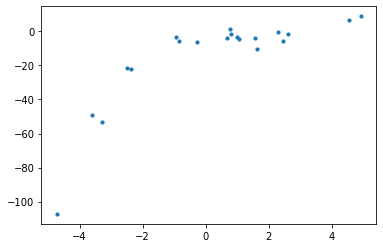

In [222]:
l= 20

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, l)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, l)
plt.scatter(X,y, s=10)
plt.show()

In [223]:
y

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

In [314]:
X = X.reshape(-1,1)

m, n = X.shape

xb = np.hstack((np.ones((m, 1)), X))

xbp = polynomial_transformation(X, 2)

# initiate coefs
theta = np.ones((xbp.shape[1], 1))

In [315]:
for _ in range(500):
    err = xbp.dot(theta) - y.reshape(-1, 1)
    gradients = 2 / m * xbp.T.dot(err)
    theta -= 0.01 * gradients

In [316]:
theta

array([[  802.60118234],
       [  360.65857329],
       [12234.00939771]])

In [216]:
l = Linreg(degree=2)

In [217]:
l.fit(X.reshape(-1,1), y, optimization='gradient_descent')

[array([[-5.18885443e+08],
       [-3.49624282e+07],
       [-4.39528401e+07],
       [-1.06727278e+09],
       [-6.21227153e+08],
       [-1.17754152e+09],
       [-3.67010726e+07],
       [-2.95654484e+08],
       [-2.62431699e+08],
       [-3.25618896e+07],
       [-1.23338339e+08],
       [-2.67900175e+08],
       [-6.62899179e+06],
       [-1.33748096e+08],
       [-2.55421424e+07],
       [-5.24568063e+07],
       [-2.95508297e+08],
       [-3.35154788e+08],
       [-5.86545657e+07],
       [-1.00861459e+09]]), array([[5.27632278e+08],
       [3.55517903e+07],
       [4.46937273e+07],
       [1.08526380e+09],
       [6.31699138e+08],
       [1.19739127e+09],
       [3.73197230e+07],
       [3.00638341e+08],
       [2.66855511e+08],
       [3.31107805e+07],
       [1.25417463e+08],
       [2.72416131e+08],
       [6.74073134e+06],
       [1.36002711e+08],
       [2.59727113e+07],
       [5.33410762e+07],
       [3.00489637e+08],
       [3.40804492e+08],
       [5.96433152e+07],
  

coefficients: [[ 1502079.87355173]
 [52186695.49842367]], 

 intercept: [3449195.39130795]

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression().fit(X, y)

In [86]:
lr.coef_, lr.intercept_

(array([ 0.        ,  8.48492679, -1.62853134]), -6.119739594096433)

In [87]:
l

coefficients: [[nan]
 [nan]], 

 intercept: [nan]